## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  14.519169   353.201368  0.239104  2.116285   85.608714
1  89.785346   524.202114  0.374167  4.093817  215.879370
2  79.594429   785.061051  0.172496  5.048441  157.016489
3  57.305984   987.981907  0.828784  6.246324  820.798710
4  45.000536  1422.008088  0.464275  1.836239  661.851173


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9807717	total: 55.9ms	remaining: 55.9s
1:	learn: 0.9716358	total: 57.1ms	remaining: 28.5s
2:	learn: 0.9608757	total: 57.6ms	remaining: 19.2s
3:	learn: 0.9495106	total: 58.2ms	remaining: 14.5s
4:	learn: 0.9371168	total: 58.7ms	remaining: 11.7s
5:	learn: 0.9267875	total: 59.2ms	remaining: 9.81s
6:	learn: 0.9121835	total: 59.7ms	remaining: 8.47s
7:	learn: 0.9000311	total: 60ms	remaining: 7.45s
8:	learn: 0.8871364	total: 60.5ms	remaining: 6.66s
9:	learn: 0.8746622	total: 60.9ms	remaining: 6.03s
10:	learn: 0.8628797	total: 61.3ms	remaining: 5.51s
11:	learn: 0.8500116	total: 61.8ms	remaining: 5.09s
12:	learn: 0.8383787	total: 62.2ms	remaining: 4.72s
13:	learn: 0.8264036	total: 62.7ms	remaining: 4.42s
14:	learn: 0.8149409	total: 63.1ms	remaining: 4.14s
15:	learn: 0.8053929	total: 63.6ms	remaining: 3.91s
16:	learn: 0.7958065	total: 64ms	remaining: 3.7s
17:	learn: 0.7866038	total: 64.4ms	remaining: 3.51s
18:	learn: 0.7790507	total: 64.9ms	remaining: 3.3

106:	learn: 0.2852443	total: 106ms	remaining: 881ms
107:	learn: 0.2815448	total: 106ms	remaining: 877ms
108:	learn: 0.2794440	total: 107ms	remaining: 872ms
109:	learn: 0.2765703	total: 107ms	remaining: 867ms
110:	learn: 0.2727942	total: 107ms	remaining: 861ms
111:	learn: 0.2703030	total: 108ms	remaining: 855ms
112:	learn: 0.2673422	total: 108ms	remaining: 848ms
113:	learn: 0.2644172	total: 108ms	remaining: 842ms
114:	learn: 0.2616974	total: 109ms	remaining: 837ms
115:	learn: 0.2591188	total: 109ms	remaining: 831ms
116:	learn: 0.2570372	total: 110ms	remaining: 827ms
117:	learn: 0.2546086	total: 110ms	remaining: 822ms
118:	learn: 0.2522827	total: 110ms	remaining: 818ms
119:	learn: 0.2500135	total: 111ms	remaining: 813ms
120:	learn: 0.2479388	total: 111ms	remaining: 809ms
121:	learn: 0.2454810	total: 112ms	remaining: 805ms
122:	learn: 0.2427209	total: 112ms	remaining: 800ms
123:	learn: 0.2397069	total: 113ms	remaining: 796ms
124:	learn: 0.2377565	total: 113ms	remaining: 792ms
125:	learn: 

273:	learn: 0.0664392	total: 181ms	remaining: 480ms
274:	learn: 0.0660241	total: 181ms	remaining: 478ms
275:	learn: 0.0655768	total: 182ms	remaining: 477ms
276:	learn: 0.0650818	total: 182ms	remaining: 476ms
277:	learn: 0.0646505	total: 183ms	remaining: 475ms
278:	learn: 0.0642413	total: 183ms	remaining: 474ms
279:	learn: 0.0638268	total: 184ms	remaining: 473ms
280:	learn: 0.0634131	total: 184ms	remaining: 472ms
281:	learn: 0.0630011	total: 185ms	remaining: 470ms
282:	learn: 0.0625860	total: 185ms	remaining: 470ms
283:	learn: 0.0621876	total: 186ms	remaining: 468ms
284:	learn: 0.0617986	total: 186ms	remaining: 467ms
285:	learn: 0.0614033	total: 187ms	remaining: 466ms
286:	learn: 0.0610150	total: 187ms	remaining: 465ms
287:	learn: 0.0606181	total: 187ms	remaining: 463ms
288:	learn: 0.0602447	total: 188ms	remaining: 462ms
289:	learn: 0.0598612	total: 188ms	remaining: 460ms
290:	learn: 0.0595102	total: 189ms	remaining: 460ms
291:	learn: 0.0590344	total: 189ms	remaining: 458ms
292:	learn: 

506:	learn: 0.0197784	total: 288ms	remaining: 280ms
507:	learn: 0.0196912	total: 288ms	remaining: 279ms
508:	learn: 0.0195987	total: 289ms	remaining: 279ms
509:	learn: 0.0195198	total: 289ms	remaining: 278ms
510:	learn: 0.0194358	total: 290ms	remaining: 277ms
511:	learn: 0.0193666	total: 290ms	remaining: 277ms
512:	learn: 0.0193111	total: 291ms	remaining: 276ms
513:	learn: 0.0192295	total: 291ms	remaining: 276ms
514:	learn: 0.0191565	total: 292ms	remaining: 275ms
515:	learn: 0.0190988	total: 292ms	remaining: 274ms
516:	learn: 0.0190454	total: 293ms	remaining: 274ms
517:	learn: 0.0189675	total: 293ms	remaining: 273ms
518:	learn: 0.0189211	total: 294ms	remaining: 272ms
519:	learn: 0.0188511	total: 294ms	remaining: 271ms
520:	learn: 0.0188013	total: 295ms	remaining: 271ms
521:	learn: 0.0187270	total: 295ms	remaining: 270ms
522:	learn: 0.0186803	total: 296ms	remaining: 270ms
523:	learn: 0.0186028	total: 296ms	remaining: 269ms
524:	learn: 0.0185547	total: 296ms	remaining: 268ms
525:	learn: 

633:	learn: 0.0132531	total: 347ms	remaining: 201ms
634:	learn: 0.0131833	total: 348ms	remaining: 200ms
635:	learn: 0.0131214	total: 348ms	remaining: 199ms
636:	learn: 0.0130571	total: 349ms	remaining: 199ms
637:	learn: 0.0129927	total: 349ms	remaining: 198ms
638:	learn: 0.0129331	total: 350ms	remaining: 198ms
639:	learn: 0.0128712	total: 350ms	remaining: 197ms
640:	learn: 0.0127935	total: 351ms	remaining: 196ms
641:	learn: 0.0127358	total: 351ms	remaining: 196ms
642:	learn: 0.0126756	total: 352ms	remaining: 195ms
643:	learn: 0.0126164	total: 352ms	remaining: 195ms
644:	learn: 0.0125607	total: 353ms	remaining: 194ms
645:	learn: 0.0125027	total: 353ms	remaining: 193ms
646:	learn: 0.0124488	total: 353ms	remaining: 193ms
647:	learn: 0.0123985	total: 354ms	remaining: 192ms
648:	learn: 0.0123370	total: 355ms	remaining: 192ms
649:	learn: 0.0123044	total: 355ms	remaining: 191ms
650:	learn: 0.0122665	total: 356ms	remaining: 191ms
651:	learn: 0.0122291	total: 356ms	remaining: 190ms
652:	learn: 

866:	learn: 0.0063300	total: 454ms	remaining: 69.7ms
867:	learn: 0.0062880	total: 455ms	remaining: 69.2ms
868:	learn: 0.0062602	total: 455ms	remaining: 68.6ms
869:	learn: 0.0062218	total: 456ms	remaining: 68.1ms
870:	learn: 0.0061812	total: 456ms	remaining: 67.5ms
871:	learn: 0.0061541	total: 456ms	remaining: 67ms
872:	learn: 0.0061171	total: 457ms	remaining: 66.5ms
873:	learn: 0.0060928	total: 457ms	remaining: 65.9ms
874:	learn: 0.0060536	total: 458ms	remaining: 65.4ms
875:	learn: 0.0060392	total: 458ms	remaining: 64.9ms
876:	learn: 0.0060134	total: 459ms	remaining: 64.4ms
877:	learn: 0.0059777	total: 459ms	remaining: 63.8ms
878:	learn: 0.0059637	total: 460ms	remaining: 63.3ms
879:	learn: 0.0059385	total: 460ms	remaining: 62.8ms
880:	learn: 0.0059035	total: 461ms	remaining: 62.3ms
881:	learn: 0.0058665	total: 461ms	remaining: 61.7ms
882:	learn: 0.0058534	total: 462ms	remaining: 61.2ms
883:	learn: 0.0058319	total: 462ms	remaining: 60.6ms
884:	learn: 0.0058191	total: 463ms	remaining: 60

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


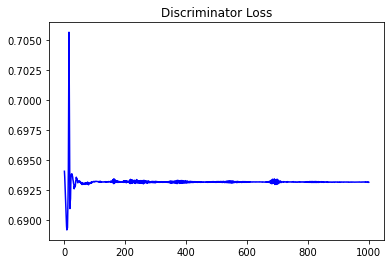

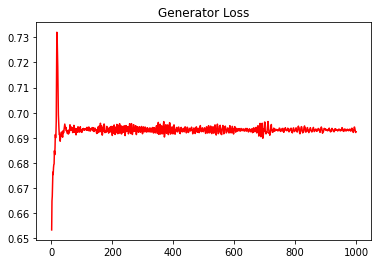

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.019685999522504657


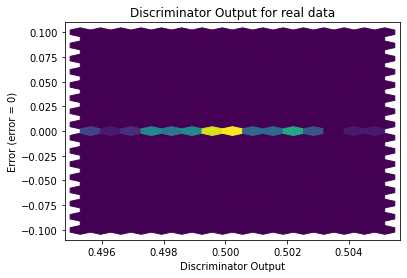

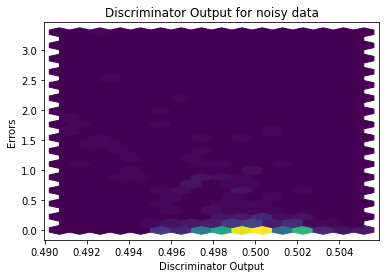

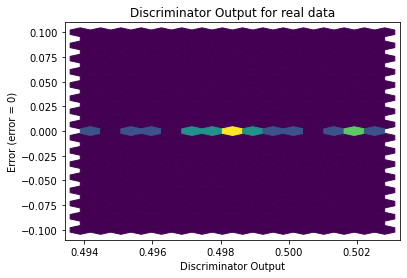

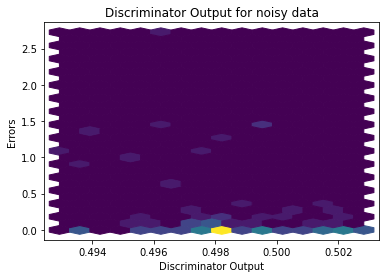

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1590]], requires_grad=True)
